# Global Pandemic: Understanding COVID-19 Trends by Visualization
-- Jiani Shi

code:https://github.com/jianis/jianis.github.io/blob/master/final_project_dv.py

Since first being recorded late last year in China, the Covid-19 coronavirus has spread around the world, and been declared a pandemic by the World Health Organization. The U.S. now has the largest number of confirmed COVID-19 cases globally, people could have a better understanding on the global trend in data visualization.

Now several different COVID19 data sources are released, including from the World Health Organization, from the European Center for Disease Control and Prevention (ECDC), and from Johns Hopkins University. So, which dataset should we choose to have the visualization?

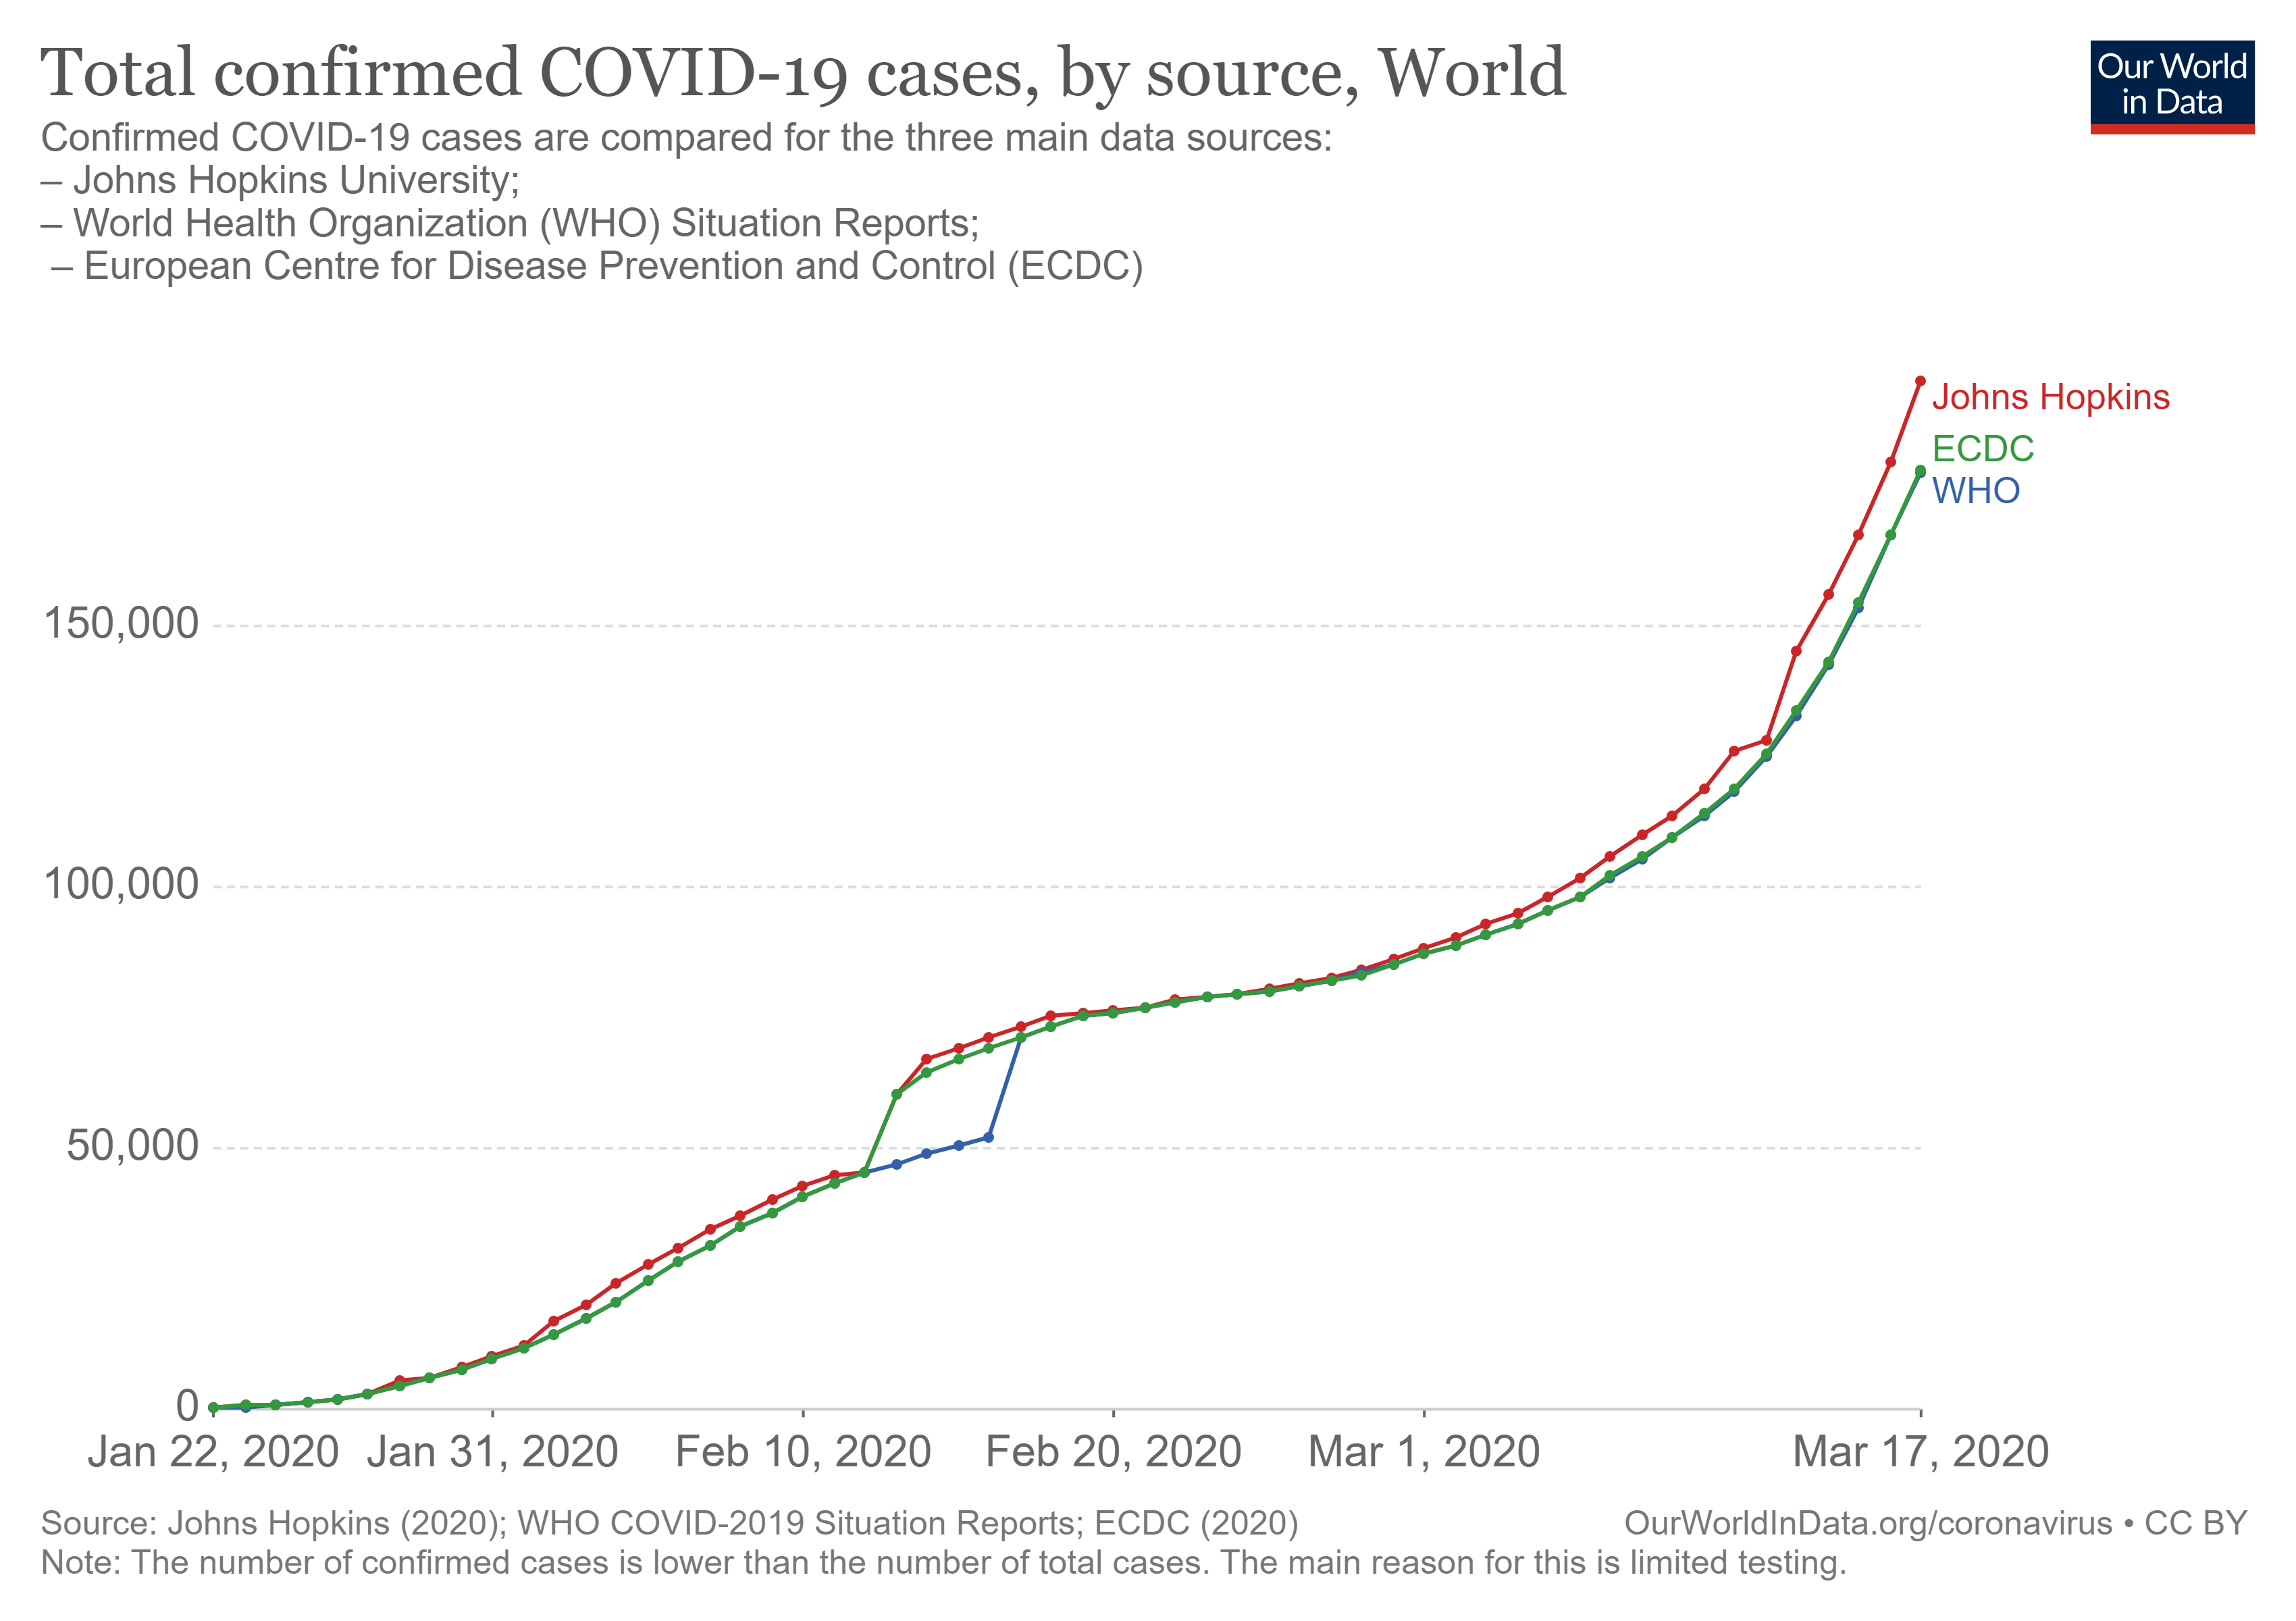

In [1]:
from PIL import Image
image = Image.open('./covid-cases-by-source.png')
image

This figure is a comparison of COVID-19 data from the three sources mentioned above.This visualization is from https://ourworldindata.org/grapher/covid-cases-by-source.
And we could see from this graph that although the trends are very close, the numbers from Johns Hopkins University are higher than others. This may be because Johns Hopkins also includes estimates of presumptive posivie cases, which have not been confirmed by state or local labs but not by national labs. Therefore, I choose Johns Hopkins dataset as my source for data visualization. And my data is dowloaded from data.world.(https://data.world/covid-19-data-resource-hub/covid-19-case-counts)

In [2]:
%matplotlib inline
import pandas as pd
import bqplot
import numpy as np
import matplotlib.pyplot as mplt
from bqplot import pyplot as plt

Below is information about the dataset.
This dataset has 13 columns. I 'm going to use 4 of them in my project.
#### case_type
There are two case types: confirmed cases and deaths.
#### cases
The number of cases
#### date
The date that the number of cases are recorded
#### country_region
the names of countries


In [109]:
f= pd.read_csv("C:/Users/sjnnt/is590dv/COVID-19 Cases_re.csv",dtype = {'Country_Region':str})
f.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
0,Confirmed,319,1,2020-04-11,Mauritius,NaN,NaN,NaN,NaN,-20.2000,57.5000,Time Series,4/12/2020 8:14:42 PM
1,Deaths,0,0,2020-02-27,Bahamas,NaN,NaN,NaN,NaN,25.0343,-77.3963,Time Series,4/12/2020 8:14:42 PM
2,Confirmed,16,0,2020-02-16,Germany,NaN,NaN,NaN,NaN,51.0000,9.0000,Time Series,4/12/2020 8:14:42 PM
3,Deaths,0,0,2020-01-31,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/12/2020 8:14:42 PM
4,Deaths,0,0,2020-03-04,Australia,Queensland,NaN,NaN,NaN,-28.0167,153.4000,Time Series,4/12/2020 8:14:42 PM


In [110]:
i =11
j = 0
f_agg = f['Cases'].groupby([f['Country_Region'],f['Date'],f['Case_Type']]).sum().reset_index(name = 'Total_Cases')
# mask_1 = (f_agg['Country_Region'].values == co[i]) &(f_agg['Case_Type'].values == ty[j])
f_agg.head()


,Country_Region,Date,Case_Type,Total_Cases
0,Afghanistan,2020-01-22,Confirmed,0
1,Afghanistan,2020-01-22,Deaths,0
2,Afghanistan,2020-01-23,Confirmed,0
3,Afghanistan,2020-01-23,Deaths,0
4,Afghanistan,2020-01-24,Confirmed,0


To understand the curve and trends of spread, we can study from three countries as example: US, Italy and China. COVID19 first started in China, rapidly increased then remained steady. The break out in Italy was later but the cases also increase in the same rate as China. However, the situation in US is worse apparently, the curve climb dramatically.

In [108]:
import plotly.graph_objects as go
mask1 =(f_agg['Country_Region'].values == 'US') &(f_agg['Case_Type'].values == 'Confirmed')
mask2 = (f_agg['Country_Region'].values == 'Italy') &(f_agg['Case_Type'].values == 'Confirmed')
mask3 = (f_agg['Country_Region'].values == 'China') &(f_agg['Case_Type'].values == 'Confirmed')
fig = go.Figure()
fig.add_trace(go.Scatter(x=f_agg[mask1]['Date'], y=f_agg[mask1]['Total_Cases'],
                    mode='lines+markers',
                    name='US'))
fig.add_trace(go.Scatter(x=f_agg[mask2]['Date'], y=f_agg[mask2]['Total_Cases'],
                    mode='lines+markers',
                    name='Italy'))
fig.add_trace(go.Scatter(x=f_agg[mask3]['Date'], y=f_agg[mask3]['Total_Cases'],
                    mode='lines+markers',
                    name='China'))
fig.update_layout(
    height=800,
    title_text='Confirmed COVID19 cases in US, Italy, and China'
)

fig.show()

The next visualization is a overview about the cases of the latest record in the dataset, April 12th,2020. Users could choose the range the axes for zooming in or zooming out, to find the country they want.Also, we could find in the latest record, the number of cases in US is significatly large, nearly 3 times than the second one.

In [107]:
import plotly.express as px
#overview the cases globally
mask4= (f_agg['Date'].values == '2020-04-12')
f_lat = f_agg[mask2]
fig = px.histogram(f_lat, x="Country_Region",y = "Total_Cases", color="Case_Type",histfunc='sum',hover_data=f_lat.columns)
fig.update_layout(
    height=800,
    title_text='global COVID19 cases, April 12, 2020'
)
fig.show()

What's more the scatter plot below shows the relationship between confirmed cases and deaths cases. The death rate seems to be extremely high in US, Italy and Spain.

In [106]:
import plotly.graph_objects as go
from pandas import Series,DataFrame

data = {'Country_Region':Series(f_lat[mask_con]['Country_Region']).reset_index()['Country_Region'],
       'Confirmed_Cases':Series(f_lat[mask_con]['Total_Cases']).reset_index()['Total_Cases'],
       'Deaths_Cases': Series(f_lat[mask_dea]['Total_Cases']).reset_index()['Total_Cases']}
df_reset = DataFrame(data)

fig = px.scatter(df_reset, x='Confirmed_Cases', y='Deaths_Cases', text='Country_Region', log_x=True, size_max=60)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='Total confirmed COVID-19 cases vs deaths cases, April 12, 2020'
)

fig.show()

I choose plotly as the main tool for visualizaiton because of its advanced function and rich document.However, the technique I used could not support the name of country as the index of generating choropleth map. So I have to look for other datasets contains 3-letter alpha codes of countries, which could be indexed easily by our tools. And after revising the format, I linked the two datasets together.( (https://gist.github.com/tadast/8827699) )

In [8]:
ios= pd.read_csv("C:/Users/sjnnt/is590dv/countries_codes_and_coordinates.csv",dtype = {'Alpha-3 code':str})
ios[:10]

,Country_Region,Alpha-2 code,Alpha-3-code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""
5,Angola,"""AO""","""AGO""","""24""","""-12.5""","""18.5"""
6,Anguilla,"""AI""","""AIA""","""660""","""18.25""","""-63.1667"""
7,Antarctica,"""AQ""","""ATA""","""10""","""-90""","""0"""
8,Antigua and Barbuda,"""AG""","""ATG""","""28""","""17.05""","""-61.8"""
9,Argentina,"""AR""","""ARG""","""32""","""-34""","""-64"""


In [111]:
import re
# revise the format of columns
for i in range(0,len(ios)):
    ios['Alpha-3-code'][i] = re.sub('"','',ios['Alpha-3-code'][i]) 
    ios['Alpha-3-code'][i] = re.sub(' ','',ios['Alpha-3-code'][i]) 
ios.head()

,Country_Region,Alpha-2 code,Alpha-3-code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""",AFG,"""4""","""33""","""65"""
1,Albania,"""AL""",ALB,"""8""","""41""","""20"""
2,Algeria,"""DZ""",DZA,"""12""","""28""","""3"""
3,American Samoa,"""AS""",ASM,"""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""",AND,"""20""","""42.5""","""1.6"""


In [113]:
f_new = pd.merge(f_agg,ios,on= 'Country_Region',how = 'left')
f_agn = f_new['Total_Cases'].groupby([f_new['Country_Region'],f_new['Date'],f_new['Case_Type'],f_new['Alpha-3-code']]).sum().reset_index(name = 'Total_Cases')
f_agn.head()

,Country_Region,Date,Case_Type,Alpha-3-code,Total_Cases
0,Afghanistan,2020-01-22,Confirmed,AFG,0
1,Afghanistan,2020-01-22,Deaths,AFG,0
2,Afghanistan,2020-01-23,Confirmed,AFG,0
3,Afghanistan,2020-01-23,Deaths,AFG,0
4,Afghanistan,2020-01-24,Confirmed,AFG,0


In [114]:
df = f_agn[mask_c]

import plotly.express as px


fig = px.choropleth(df, locations='Alpha-3-code', 
                    color='Total_Cases',
                    hover_name = "Country_Region",
                    animation_frame = 'Date',
                    projection = "natural earth",
                   title = 'Confirmed Cases of COVID19')

fig.show()

Let us first visualize the choropleth map dynamically. This figure only shows the confirmed cases.We could find the different colors represent different number of cases. Darker means less cases in this country. Using the play button, we could also watch the animation of changed COVID19 cases in the world from January 22th to April 7th. What we can find in this map is that the peak value started in China and quickly transferred to US.

Next, I use dash in plotly to generate an interactie graph. Dash is a productive Python framework for building web applications. It's also ideal for building data visualization in Pyton. In this situation, it supported all interactive functions for us.

In [26]:
import dash

import plotly.express as px
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output



external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

available_countries = f_new['Country_Region'].unique()

app.layout = html.Div([
    html.Div([
        html.Div([
            dcc.Dropdown(
            id = 'case_type',
            options = [{'label':'Confirmed','value':'Confirmed'},
                       {'label':'Deaths','value':'Deaths'}],
            value = 'Confirmed'
            )
        ],
        style={'width': '48%', 'display': 'inline-block'})
        
    ]),
    html.Div([
        dcc.Graph(id = 'map',
            hoverData={'points': [{'hovertext': 'US'}]})
    ], style={'display': 'inline-block', 'width': '60%'}),
    html.Div([
        dcc.Graph(id = 'line_plot')
    ], style={'width': '30%', 'display': 'inline-block', 'padding': '0 20'})

])

@app.callback(
    Output('line_plot','figure'),
    [Input('case_type','value'),
     Input('map','hoverData')]
    
)


def update_graph(case_type,hoverData):
    country_name= hoverData['points'][0]['hovertext']
    dff = f_new[(f_new['Country_Region'] == country_name) & (f_new['Case_Type'] == case_type)]
    return {'data': [dict(
            x =  dff['Date'],
            y = dff['Total_Cases'],
            text = dff['Total_Cases'],
            mode = 'lines+markers'
        )],
        'layout':{
            'xaxis' :{
                'title':'date'
            },
            'yaxis' :{
                'title': country_name,
                'type':'linear'
            },
            'height':450,
            'margin':{'l': 40, 'b': 60, 'r': 0, 't': 0},
            'text':hoverData
            
        }
    }



@app.callback(
    Output('map','figure'),
    [Input('case_type','value')]
)


def create_map(case_type):
    dfff = f_new[f_new['Case_Type']==case_type]
    figure = px.choropleth(dfff, locations='Alpha-3-code', 
                            color='Total_Cases',
                            hover_name = "Country_Region",
                            animation_frame = 'Date',
                            projection = "natural earth",
                           title = 'Confirmed Cases of COVID19')
    figure.update_layout(hovermode = 'closest')
    return figure



The dash app runs in a local server at beginning. To share it, I dployed it via public Flask application in Heroku platform.

The final figure has two components, a choropleth map and the line charts showing the curve of one specific country. The dropdown menu allows users to choose to visualize confirmed cases or deaths cases. What's more, the details like name of country, the date and number of cases would be listed when mouse over values in the graph. Meanwhile, the right part would show the time series curve of the country user choose. Besides,this fugure is also interactive, which could show the numbers of each time point. Finally, we could look up any records interesting in this dataset via this visualization.

In [115]:
from IPython.display import IFrame    
IFrame(" https://jianis.herokuapp.com/", width=1000 ,height=600)

### Data resource
Johns Hopkins dataset:(https://data.world/covid-19-data-resource-hub/covid-19-case-counts)
3-letter alpha codes:(https://gist.github.com/tadast/8827699)